<H1>----------------------------------------------------------------------------------------------------------</H1>
<H1> TITLE: Prediction of Success of a Project before release </H1>
<H1>----------------------------------------------------------------------------------------------------------</H1>

<H1>----------------------------------------------------------------------------------------------------------</H1>
<b>Abstract: </b>

This project focus on predicting the success of a project before its released in the market. This could save millions, if not billions, of lost dollars due to minor errors that could be debugged if carefully tested. The problem that we are solving is a prediction of the success of the project before it is released. If we are able to solve this problem efficiently, then people can run our model to test the success of the project and check for themselves on how to improve their project for greater success. We approached this problem by starting with data collection. We then performed data pre-processing and data visualization. We then performed data transformation and fed the data to the machine learning models like logistic regression and random forest classifier. Our results show that the choice of logistic regression gave very good prediction accuracy of the success of the project.


<H1>----------------------------------------------------------------------------------------------------------</H1>
<b> Background:  </b>

a. Description of the Data Science Problem:
   
   The current data science problem we are trying to solve is that we are trying to predict the success of a project before it is released in the real world. 
   
  <b> Hurdles/Challenges faced : </b>
   
There are many hurdles in solving this problem, some of them being working with the data collection of huge dataset from different sources. After obtaining the relevant data, cleaning the data is a big challenge here. Dropping irrelevant columns/values and performing feature engineering demands various operations to be executed in logical steps. After this step, understanding the data using proper visualization techniques is another hurdle since a data can have many different ways to be visualized but finding the key data points and designing appropriate visualization techniques for them make a huge difference in understanding what the data is trying to convey. Transforming the data and getting it ready to be fed to the Machine Learning Models is the next logical step. Finally, choosing an appropriate algorithm and getting a high value of prediction accuracy indicated how well the data was cleaned and prepared for the Machine learning models. 

b. Motivation for Problem:
  
  A huge variety of factors contribute to the success or failure of a project. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyze Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.

c. References / Existing Software:
<b> Link to the Dataset: </b>

Size of the original Dataset <b>~43GB</b>

https://webrobots.io/kickstarter-datasets/

<H1>----------------------------------------------------------------------------------------------------------</H1>

<H4>Methodology/ Steps taken to perform the entire Data Analysis:</H4>

We have divided the entire task of Data Analysis into manageable chunks of actions. We divided the task into these broad 5 categories as shown below and they further contain various small steps of data analysis:
<b>
    
    Step 1: Web Scraping (Data collection)
    Step 2: Pre-processing the Data
    Step 3: Exploratory Data Analysis
    Step 4: Transformaing the Data
    Step 5: Machine Learning Modelling of Data for prediction
</b>

<H1>----------------------------------------------------------------------------------------------------------</H1>

### Import packages and libraries for <br>

<li> Web Scraping </li>
<li> Feature Transformation </li>
<li> Exploratory Data Analysis </li>
<li> Data Transformation </li>
<li> Data Modelling </li>

In [3]:
from __future__ import unicode_literals
from bs4 import BeautifulSoup
from contextlib import closing
from requests import get
from requests.exceptions import RequestException
from zipfile import ZipFile
from glob import glob
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import csv
import html5lib
import json
import logging
import os
import pandas as pd
import numpy as np
import re
import sys
import time
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# STEP 1: WEB SCRAPING  (Data collection)

Here we perform Web Scraping in order to collect the data to work with. We can also call this step as Data Collection. This is the first step to start dealing with a data science problem.

In [2]:
logging.basicConfig(filename = 'scraping_logs.log', filemode='a', level=logging.INFO)

In [3]:
logger = logging.getLogger('test')
logger.setLevel(logging.INFO)
logger.addHandler(logging.StreamHandler(sys.stdout))
pd.options.display.max_colwidth = -1
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Step 1.1: <b>Collect CSV urls for download<b>

In [4]:
def get_html(url):
    """This function makes a GET Request to the url specified.
    This gets the raw HTML content if there is a good response.
    """
    try:
        resp = get(url, stream=True, timeout=30)
        if resp.status_code == 200:
            return resp.content
        else:
            return None
    except Exception as e:
        logging.exception(str(e))

In [5]:
def get_csvfile_url(parsed_data_html):
    """This function gets the url's of all the CSV files specified for all the data files.
    """
    try:
        parsed_data_bs = BeautifulSoup(parsed_data_html, "html.parser")
        parsed_data_class = parsed_data_bs.find('div', {'class': 'fusion_text'})
        dataset_csvfile_url = []
        links = parsed_data_bs.findAll('li')
        all_links = []
        for link in links:
            csv_url = link.findAll('a')
            for url in csv_url:
                if 'json' not in url['href'] and 'Kickstarter' in url['href']:
                    all_links.append(url['href'])
        return all_links
    except Exception as e:
        logging.exception(str(e))

### Step 1.2: Download and Extract zip files of dataset

In [6]:
def download_and_extract(zipFiles):
    """This Function downloads all the zip files from the urls
    specified by the results in the previous step.
    Module ZipFile helps extract all the contents in the current
    directory
    """
    for res in zipFiles:
        name = res.split('/')[-1]
        dirt = name.split('.')[0]
        os.system('wget '+res)
        with ZipFile(name, 'r') as zip_file_obj:
            zip_file_obj.extractall(dirt)

In [7]:
# Here we fetch the data from the dataset available at "https://webrobots.io/kickstarter-datasets/"
parsed_data_html = get_html('https://webrobots.io/kickstarter-datasets/')
results = get_csvfile_url(parsed_data_html)

In [8]:
#This are the sample csv urls to be downloaded 
results[:5]

['https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2019-11-14T03_20_27_004Z.zip',
 'https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2019-10-17T03_20_19_421Z.zip',
 'https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2019-09-12T03_20_06_215Z.zip',
 'https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2019-08-15T03_20_03_022Z.zip',
 'https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2019-07-18T03_20_05_009Z.zip']

### Step 1.3: Find and concatenate only Kickstarter data files

In [36]:
def get_all_csv_files():
    """ This function is to aggregate all the CSV Files in project directory
    This list of files contains raw data, transformed data and feature_transformed data.
    This 3 types of data exists for the reason. 
    The original scraped data is very huge and is divided in more than 2200 files.
    This files were being concatenated to only 45 files which is done in the next step 
    and stored in transformed_data directory.
    This files huge data of 45 files were being feed to feature_transformation function
    built using the testing on small dataset, this feature_transformed data is stored in
    feautured_data directory.
    """
    extension = "*.csv"
    all_csv_files = [file
                     for path, subdir, files in os.walk('/scratch/work/jupyterhub/2019-FA-DS-GA-1007/haj272/project')
                     for file in glob(os.path.join(path, extension))]
    kickstarter = [file for file in all_csv_files if 'Kickstarter' in file]
    transformed_data = [file for file in all_csv_files if 'transformed_data' in file]
    featured = [file for file in all_csv_files if 'feature' in file]
    return kickstarter, transformed_data, featured

In [37]:
kickstarter, transformed_data, featured = get_all_csv_files()

In [38]:
len(kickstarter)

2230

In [12]:
def concatenate_data(kickstarter):
    '''Due to a large dataset, we had 2200 files, which we concatenated
    to a reasonable number, that is 45 files in this case , in order to work efficiently
    '''
    for i in range(0,2200,50):
        filename = 'transformed_data/files'+str(i)+'_to_'+str(i+50)+'.csv'
        df_from_each_file = (pd.read_csv(file) for file in kickstarter[i:i+50])
        concatenated_df1 = pd.concat(df_from_each_file, ignore_index=True)
        concatenated_df1.to_csv(filename, index=False)                                

# Step 2. PreProcessing the Data

<b> Note: 
    Before beginning to work properly on our original large dataset of 45 files, we though of testing on a small dataset to be comfortable. This is what you see in the next few lines below: </b>

### Step 2.1: Now, we begin Data Importing from 2 files concatenated and named as top2files.csv

In [13]:
df_from_each_file = (pd.read_csv(file) for file in transformed_data[10:12])
concatenated_df1 = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df1.to_csv('top2files.csv', index=False) 

/share/apps/jupyterhub/2019-FA-DS-GA-1007/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (10,13,17,18,19,23,28,36) have mixed types. Specify dtype option on import or set low_memory=False.
  
/share/apps/jupyterhub/2019-FA-DS-GA-1007/lib/python3.7/site-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (10,13,17,18,19,23,36) have mixed types. Specify dtype option on import or set low_memory=False.
  


In [41]:
# The Code below is for testing purposes.. 
df = pd.read_csv('top2files.csv', engine='python')

<b>Next few steps are data pre-processing:</b>

In [42]:
#Percentage of null values in a column
df.isnull().sum()*100/df.shape[0]

backers_count                0.000000
blurb                        0.006042
category                     0.000000
converted_pledged_amount    43.564651
country                      0.000000
created_at                   0.000000
creator                      0.000000
currency                     0.000000
currency_symbol              0.000000
currency_trailing_code       0.000000
current_currency            43.564651
deadline                     0.000000
disable_communication        0.000000
friends                     99.878647
fx_rate                     43.564651
goal                         0.000000
id                           0.000000
is_backing                  99.878647
is_starrable                43.564651
is_starred                  99.878647
launched_at                  0.000000
location                     0.318992
name                         0.000504
permissions                 99.878647
photo                        0.000000
pledged                      0.000000
profile     

In [43]:
df.drop(['friends', 'is_backing', 'is_starred', 'permissions',
         'converted_pledged_amount', 'creator', 'currency', 
         'currency_symbol', 'currency_trailing_code', 'current_currency', 
         'fx_rate', 'photo', 'pledged', 'profile', 'slug', 'source_url', 
         'spotlight', 'state_changed_at', 'urls', 'usd_type'], axis=1, inplace=True)

In [44]:
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [45]:
df['blurb_length'] = df['blurb'].str.split().str.len()

In [46]:
df['cat'] = df['category'].apply(json.loads)

In [47]:
df_temp = json_normalize(df['cat'])

In [48]:
df_temp['category1'], df_temp['subcatgory'] = df_temp.slug.str.split('/').str
df_temp.drop(['color', 'parent_id', 'name', 'id', 'position', 'urls.web.discover', 'slug'], axis=1, inplace=True)

In [49]:
df = pd.merge(df, df_temp, left_index=True, right_index=True)

In [50]:
# Checking the proportions of each category
df.disable_communication.value_counts(normalize=True)

False    0.996354
True     0.003646
Name: disable_communication, dtype: float64

In [51]:
df.drop(['disable_communication','cat', 'category'], axis=1, inplace=True)

In [52]:
# Calculate new column 'usd_goal' as goal * static_usd_rate
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)

In [53]:
# Dropping goal and static_usd_rate
df.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)

In [54]:
# Figure out what this is, and do a count_values() to figure out whether it's worth including or mostly FALSE
df.is_starrable.value_counts(normalize=True)

False    0.970663
True     0.029337
Name: is_starrable, dtype: float64

In [55]:
df.drop('location', axis=1, inplace=True)

### Step 2.2: Feature Engineering
<b> Here we perform the feature engineering (It is defined as the number of steps that needs to be taken to extract certain highly relevant features that can be used for the machine learning models to work properly) in the next few lines of code: </b>

In [56]:
# Count length of each name
df['name_length'] = df['name'].str.split().str.len()

In [57]:
df['usd_pledged'] = round(df['usd_pledged'],2)

In [58]:
# Time between creating and launching a project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days 

In [59]:
# Campaign length
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only

In [60]:
# Mean pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)

In [61]:
df.isna().sum()

backers_count                   0
blurb                          24
country                         0
created_at                      0
deadline                        0
id                              0
is_starrable               173034
launched_at                     0
name                            2
staff_pick                      0
state                           0
usd_pledged                     0
blurb_length                   24
category1                       0
subcatgory                  12056
usd_goal                        0
name_length                     2
creation_to_launch_days         0
campaign_days                   0
pledge_per_backer           43771
dtype: int64

In [62]:
df.blurb_length.fillna(0, inplace=True)

In [63]:
# Number of projects of different states
df.state.value_counts()/df.shape[0]

successful    0.506781
failed        0.410024
canceled      0.051958
live          0.027591
suspended     0.003646
Name: state, dtype: float64

In [64]:
# We have kept only Successful and Failed states, getting rid of all others. 
df = df[df['state'].isin(['successful', 'failed'])]

In [65]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

In [66]:
# Setting the id column as the index
df.set_index('id', inplace=True)
df.head()

,backers_count,blurb,country,created_at,deadline,is_starrable,launched_at,name,staff_pick,state,usd_pledged,blurb_length,category1,subcatgory,usd_goal,name_length,creation_to_launch_days,campaign_days,pledge_per_backer
id,,,,,,,,,,,,,,,,,,,
149292368,21,"Tachoir music has been described as ""Highly or...",US,2013-03-28 15:08:20,2013-05-04 14:00:34,False,2013-04-04 14:00:34,New Jerry Tachoir Group Recording,False,failed,730.0,18.0,music,jazz,3000.0,5.0,7,30,34.76
482226461,13,Doug Munro channels his Great Uncle famed comp...,US,2013-03-29 16:49:07,2013-05-08 19:02:35,False,2013-04-08 19:02:35,La Pompe Attack plays the Harry Warren Song Book,False,failed,975.0,23.0,music,jazz,10000.0,9.0,10,30,75.00
1255970801,5,Jazz vocalist David Gonzalez celebrates his up...,US,2013-02-23 03:54:38,2013-05-10 20:58:43,False,2013-04-10 20:58:43,Jus' Jazzin' In New Orleans,False,failed,400.0,18.0,music,jazz,3985.0,5.0,47,30,80.00
556635603,5,Daymond Callahan & Ahmad Johnson unite for ano...,US,2013-04-06 01:57:47,2013-05-16 00:58:33,False,2013-04-16 00:58:33,JazzPals 2013 Concert,False,failed,80.0,18.0,music,jazz,1000.0,3.0,10,30,16.00
1542780758,3,Sax/guitar duo makes funky grooves and groovy ...,US,2012-11-02 00:58:19,2013-05-17 21:29:00,False,2013-04-16 19:45:06,Smooth Jazz Launch,False,failed,50.0,9.0,music,jazz,2500.0,3.0,166,31,16.67


In [67]:
df.columns

Index(['backers_count', 'blurb', 'country', 'created_at', 'deadline',
       'is_starrable', 'launched_at', 'name', 'staff_pick', 'state',
       'usd_pledged', 'blurb_length', 'category1', 'subcatgory', 'usd_goal',
       'name_length', 'creation_to_launch_days', 'campaign_days',
       'pledge_per_backer'],
      dtype='object')

### Step 2.3: Feature Engineering at scale

<b> Feature Extraction on the smaller dataset is now complete at this stage. We are now ready to move forward with the next round of working with our original huge dataset and perform feature engineering at scale! </b>

<b> The following code is now run on our huge dataset containing 45 files to perform Feature Extraction at scale </b>

In [34]:
def feature_extraction(transformed_data):
    for file in transformed_data:
        df = pd.read_csv(file)
        # Dropping columns that are mostly null
        try:
            print(file)
            df.drop(['friends', 'is_backing', 'is_starred', 'permissions',
                     'converted_pledged_amount', 'creator', 'currency', 
                     'currency_symbol', 'currency_trailing_code', 'current_currency', 
                     'fx_rate', 'photo', 'pledged', 'profile', 'slug', 'source_url', 
                     'spotlight', 'state_changed_at', 'urls', 'usd_type'], axis=1, inplace=True)
            cols_to_convert = ['created_at', 'deadline', 'launched_at']
            for c in cols_to_convert:
                df[c] = pd.to_datetime(df[c], origin='unix', unit='s')
            df['blurb_length'] = df['blurb'].str.split().str.len()
            df['cat'] = df['category'].apply(json.loads)
            df_temp = json_normalize(df['cat'])
            df_temp['category1'], df_temp['subcatgory'] = df_temp.slug.str.split('/').str
            df_temp.drop(['color', 'parent_id', 'name', 'id', 'position', 'urls.web.discover', 'slug'], axis=1, inplace=True)
            df = pd.merge(df, df_temp, left_index=True, right_index=True)
            # Checking the proportions of each category
            df.drop(['disable_communication','cat', 'category'], axis=1, inplace=True)
            # Calculate new column 'usd_goal' as goal * static_usd_rate
            df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)
            # Dropping goal and static_usd_rate
            df.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)
            df.drop('location', axis=1, inplace=True)
            # Count length of each name
            df['name_length'] = df['name'].str.split().str.len()
            df['usd_pledged'] = round(df['usd_pledged'],2)
            # Time between creating and launching a project
            df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
            df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days 
            # Campaign length
            df['campaign_days'] = df['deadline'] - df['launched_at']
            df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
            # Mean pledge per backer
            df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)
            df.blurb_length.fillna(0, inplace=True)
            # We have kept only Successful and Failed states, getting rid of all others. 
            df = df[df['state'].isin(['successful', 'failed'])]
            df.drop_duplicates(subset='id', keep='first', inplace=True)
            # Setting the id column as the index
            df.set_index('id', inplace=True)
            filename = '/scratch/work/jupyterhub/2019-FA-DS-GA-1007/haj272/project/feature_transformed/feature_'+file.split('files')[1]
            print(filename)
            df.to_csv(filename, index=False)
        except:
            continue

In [ ]:
feature_extraction(transformed_data)

<b> After completing the stage of extracting features from our huge dataset, we created intermediate files to concatenate all the feature_extracted data, then we create a new CSV file called "final_data" that will contain our feature extracted data from the entire dataset. This was done on a separate notebook. This is done to conveniently prepare ourselves for the next round, which is Data Exploration. </b>

In [17]:
# concatenate all feature transformed data
df_from_each_file = (pd.read_csv(file,engine='python') for file in featured)
concatenated_df = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df.to_csv('final_data.csv',index=False)

/share/apps/jupyterhub/2019-FA-DS-GA-1007/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
data = pd.read_csv('final_data.csv')

/share/apps/jupyterhub/2019-FA-DS-GA-1007/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,12,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.shape

(3095633, 28)

In [7]:
data.drop(['name','staff_pick','country_displayable_name','subcatgory','is_starrable','deadline_day', 'deadline_hour', 'deadline_month','launch_day',
       'launch_hour', 'launch_month','last_update_published_at','pledge_per_backer','unread_messages_count','unseen_activity_count'],axis=1,inplace=True)

In [8]:
data.dropna(subset=['name_length'],inplace=True)

In [9]:
data.isnull().sum()

backers_count              0
blurb_length               0
campaign_days              0
category1                  0
country                    0
created_at                 0
creation_to_launch_days    0
deadline                   0
launched_at                0
name_length                0
state                      0
usd_goal                   0
usd_pledged                0
dtype: int64

# Step 3: Exploratory Data Analysis

## Step 3.1: Key Statistics of KickStarter Projects

In [10]:
print("Earliest Date the project was created : ", min(data.created_at))
print("Latest Date the project was created : ", max(data.created_at))

Earliest Date the project was created :  2009-04-21 17:35:35
Latest Date the project was created :  2019-10-09 11:55:00


In [11]:
print("Earliest Date of the project's deadline : ", min(data.deadline))
print("Latest Date of the project's deadline : ", max(data.deadline))

Earliest Date of the project's deadline :  2009-05-03 06:59:59
Latest Date of the project's deadline :  2019-10-17 05:01:00


In [12]:
print("Total number of projects launched on Kickstarter is: {0:,}".format(len(data)))
print("Total number of successfully funded projects is: {0:,}".format(len(data.loc[data['state'] == 'successful'])))
print(f"The proportion of successfully funded completed projects is: {int(round((len(data.loc[data['state'] == 'successful'])/len(data))*100,0))}%")

Total number of projects launched on Kickstarter is: 3,095,611
Total number of successfully funded projects is: 1,695,605
The proportion of successfully funded completed projects is: 55%


In [13]:
print("The total amount of money raised by projects is ${0:,.0f}".format(data.usd_goal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(data.usd_pledged.sum()))
print("The total amount of money pledged to successful projects by backers is ${0:,.0f}".format(sum(data.loc[data['state'] == 'successful'].usd_pledged)))

The total amount of money raised by projects is $121,146,841,894
The total amount of money pledged by backers is $38,329,196,202
The total amount of money pledged to successful projects by backers is $36,690,675,300


In [14]:
print("The mean project fundraising goal is ${0:,.0f}".format(data.usd_goal.mean()))

The mean project fundraising goal is $39,135


In [15]:
print("The mean amount pledged per project is ${0:,.0f}".format(data.usd_pledged.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(data.loc[data['state'] == 'successful'].usd_pledged.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(data.loc[data['state'] == 'failed'].usd_pledged.mean()))

The mean amount pledged per project is $12,382
The mean amount pledged per successful project is $21,639
The mean amount pledged per failed project is $1,170


In [16]:
print("The mean number of backers per project is", int(round(data.backers_count.mean(),0)))
print("The mean number of days a campaign is run for is", int(round(data.campaign_days.mean(),0)))

The mean number of backers per project is 147
The mean number of days a campaign is run for is 33


<h4><b> The key insights from the above analysis are summarized below:
    
    Earliest Date the project was created :  2009-04-21 17:35:35
    
    Latest Date the project was created :  2019-10-09 11:55:00
    
    Earliest Date of the project's deadline :  2009-05-03 06:59:59
    
    Latest Date of the project's deadline :  2019-10-17 05:01:00
    
    Total number of projects launched on Kickstarter is: 3,095,611
    
    Total number of successfully funded projects is: 1,695,605
    
    The proportion of successfully funded completed projects is: 55%
    
    The total amount of money raised by projects is $121,146,841,894
    
    The total amount of money pledged by backers is $38,329,196,202
    
    The total amount of money pledged to successful projects by backers is $36,690,675,300
    
    The mean project fundraising goal is $39,135
    
    The mean amount pledged per project is $12,382
    
    The mean amount pledged per successful project is $21,639
    
    The mean amount pledged per failed project is $1,170
    
    The mean number of backers per project is 147
    
    The mean number of days a campaign is run for is 33
    
</b></h4>

## Step 3.2: Visualizing the data

At this step we would try to get sense of the overall trends in data by visualizing it in different ways. This will help us understand the raw data in more intuitive manner

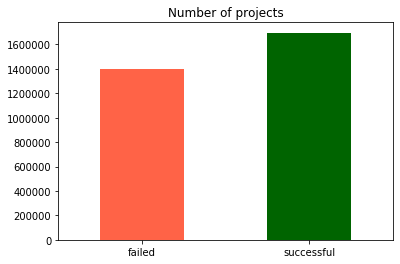

In [22]:
ax = data['state'].value_counts(ascending=True).plot(kind='bar', color=['tomato', 'darkgreen'], rot=0)
ax = ax.set_title('Number of projects')

<b> Figure: The total number of projects that have failed VS successful </b>

1. The above figure helps us understand the number of successful and failed projects in our dataset
2. We see that the number of failed projects is less than the number of successful projects

In [18]:
data.launched_at = pd.to_datetime(data.launched_at)

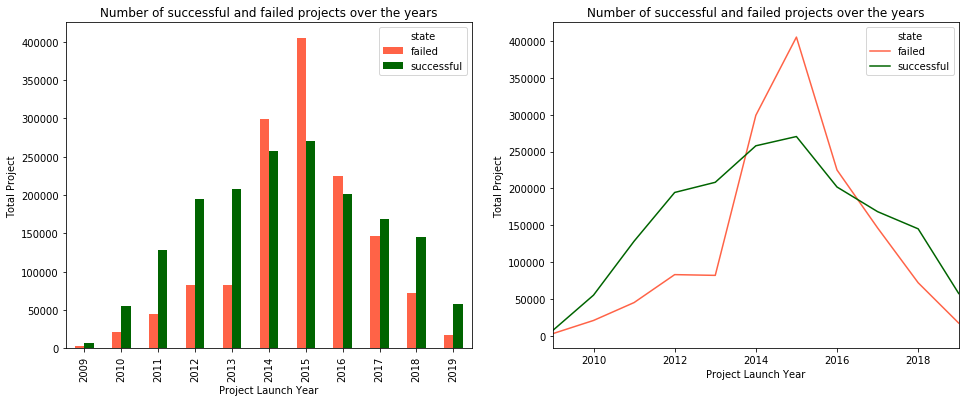

In [24]:
data['launch_year'] = data['launched_at'].dt.year
project_years = data.set_index('launch_year').state.sort_index()
data_by_year = project_years.groupby(project_years.index).value_counts().unstack()
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0] = data_by_year.plot(kind='bar', ax=ax[0], color=['tomato', 'darkgreen'])
ax[0].set_xlabel('Project Launch Year')
ax[0].set_ylabel('Total Project')
ax[0].set_title('Number of successful and failed projects over the years')
ax[1] = data_by_year.plot(ax=ax[1], color=['tomato', 'darkgreen'])
ax[1].set_xlabel('Project Launch Year')
ax[1].set_ylabel('Total Project')
ax[1] = ax[1].set_title('Number of successful and failed projects over the years')

<b> Figure A (Left): Bar Graph of the total number of failed vs successful projects from the years 2009-2019 </b>

<b> Figure B (Right): Line Graph of the total number of failed vs successful projects from the years 2009-2019 </b>
    
1. We see that the number of failed and successful projects have similar paths 
2. The number of both successful and failes projects were at peak in 2015

In [25]:
state_group = data.groupby('state')

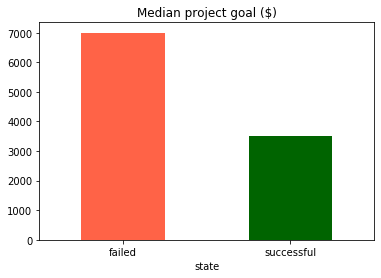

In [26]:
ax = state_group.usd_goal.median().plot(kind='bar', color=['tomato', 'darkgreen'], rot=0)
ax = ax.set_title('Median project goal ($)')

<b> Figure: The Project Goal in USD for failed VS successful projects </b>

1. The above figure helps us understand the financial amount of project goal
    in successful and failed projects in our dataset
2. We see that the financial goal of failed projects is much higher than that of successful projects

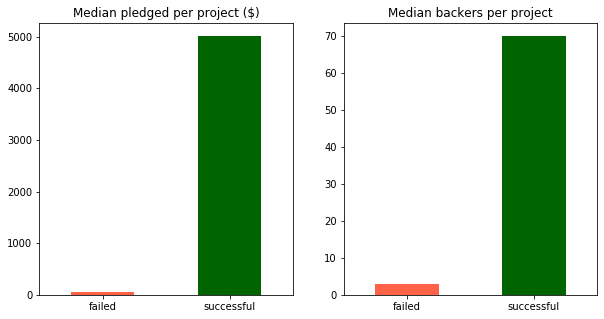

In [27]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0] = state_group.usd_pledged.median().plot(kind='bar', ax=ax[0], color=['tomato', 'darkgreen'], rot=0)
ax[0].set_title('Median pledged per project ($)')
ax[0].set_xlabel('')
ax[1] = state_group.backers_count.median().plot(kind='bar', ax=ax[1], color=['tomato', 'darkgreen'], rot=0)
ax[1].set_title('Median backers per project')
ax[1] = ax[1].set_xlabel('')

<b> Figure A (Left) : Median Amount of dollars pledged per project that failed vs succeeded</b>

<b> Figure B (right) : Median number of backers per project that failed vs succeeded</b>

1. It could be the reason that more dollars pledged to the project helped it succeed
2. More backers might mean more motivation to make the project successful

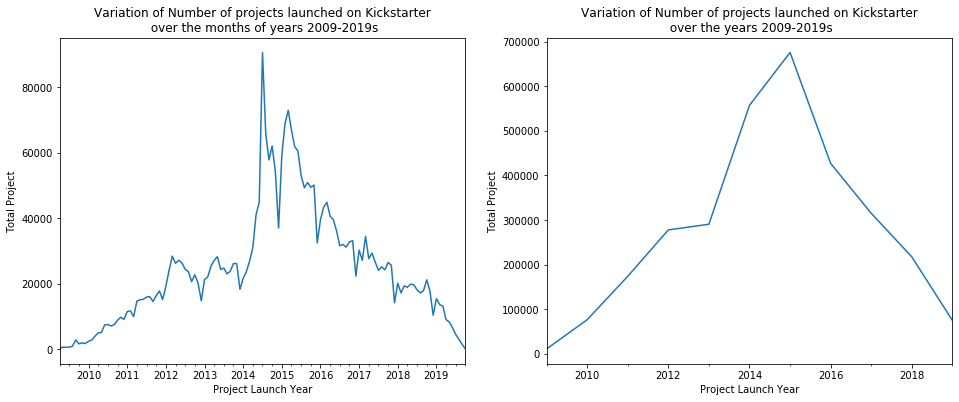

In [19]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0] = data.set_index('launched_at').country.resample('MS').count().plot(ax=ax[0])
ax[0].set_xlabel('Project Launch Year')
ax[0].set_ylabel('Total Project')
ax[0].set_title('Variation of Number of projects launched on Kickstarter\n over the months of years 2009-2019s')
ax[1] = data.set_index('launched_at').country.resample('YS').count().plot(ax=ax[1])
ax[1].set_xlabel('Project Launch Year')
ax[1].set_ylabel('Total Project')
ax[1] = ax[1].set_title('Variation of Number of projects launched on Kickstarter\n over the years 2009-2019s')

<b> Figure A (Left) : Variation of Number of projects launched on Kickstarter over the months of years 2009-2019s</b>

<b> Figure B (right) : Variation of Number of projects launched on Kickstarter over the years 2009-2019s</b>

1.We notice that in 2014-2016, number of project launches peaked

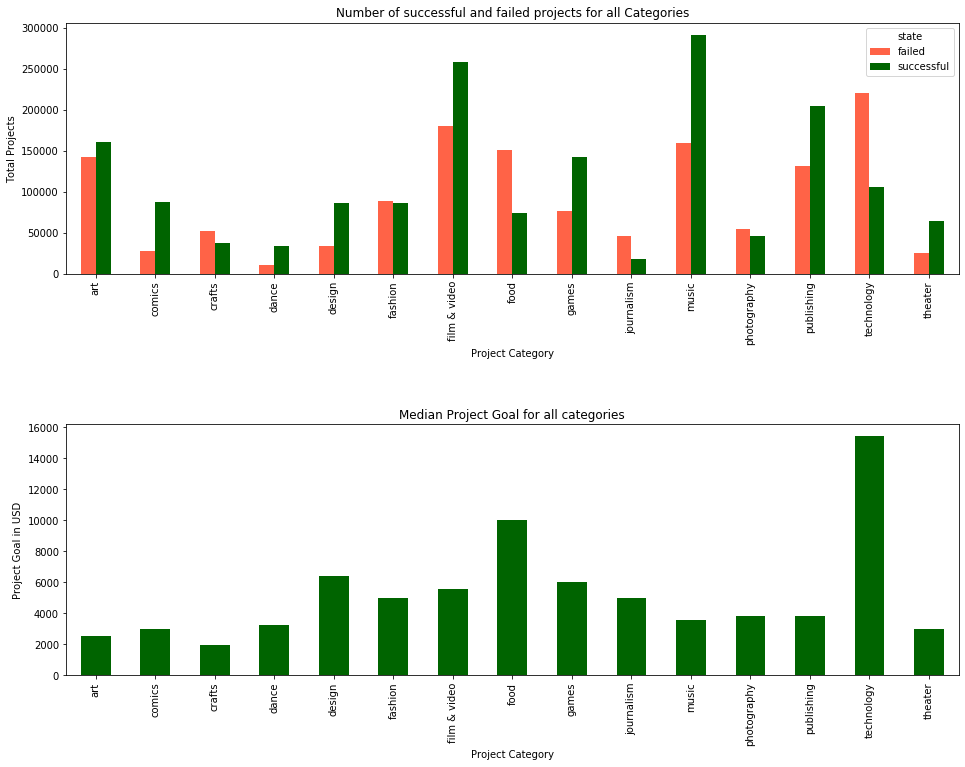

In [29]:
category_state = data.set_index('category1').state.sort_index()
category_state = category_state.groupby(category_state.index).value_counts().unstack()
fig, ax = plt.subplots(2,1,figsize=(16,12))
ax[0] = category_state.plot(kind='bar', ax=ax[0], color=['tomato', 'darkgreen'])
ax[0].set_xlabel('Project Category')
ax[0].set_ylabel('Total Projects')
ax[0].set_title('Number of successful and failed projects for all Categories')

category_goal = data.set_index('category1').usd_goal.sort_index()
category_goal = category_goal.groupby(category_goal.index).median()
ax[1] = category_goal.plot(kind='bar', ax=ax[1], color=['darkgreen'])
ax[1].set_xlabel('Project Category')
ax[1].set_ylabel('Project Goal in USD')
ax[1] = ax[1].set_title('Median Project Goal for all categories')
fig.subplots_adjust(hspace=0.6)
plt.show()

<b> Figure A (Left) : Number of successful and failed projects for all Categories </b>

<b> Figure B (right) : Median Project Goal for all categories </b>

1. We notice that the most number of successful projects are from entertainment industry like music, films etc

2. We also notice that the technology related projects had the highest project goal in USD

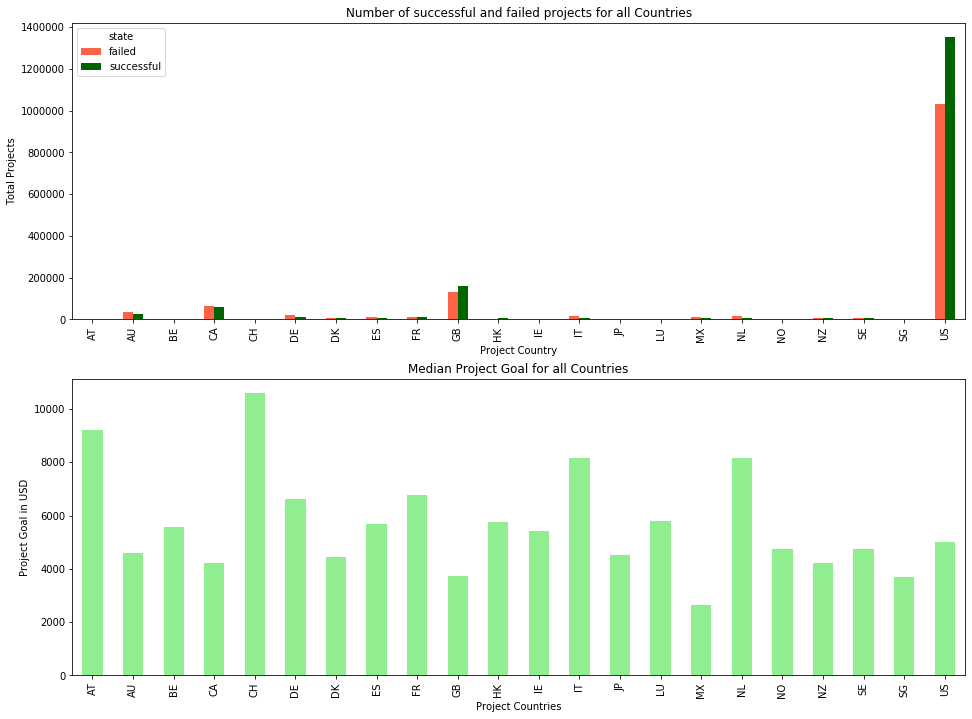

In [30]:
country_state = data.set_index('country').state.sort_index()
country_state = country_state.groupby(country_state.index).value_counts().unstack()
fig, ax = plt.subplots(2,1,figsize=(16,12))
ax[0] = country_state.plot(kind='bar', ax=ax[0], color=['tomato', 'darkgreen'])
ax[0].set_xlabel('Project Country')
ax[0].set_ylabel('Total Projects')
ax[0].set_title('Number of successful and failed projects for all Countries')

country_state = data.set_index('country').usd_goal.sort_index()
country_state = country_state.groupby(country_state.index).median()
ax[1] = country_state.plot(kind='bar', ax=ax[1], color=['lightgreen'])
ax[1].set_xlabel('Project Countries')
ax[1].set_ylabel('Project Goal in USD')
ax[1] = ax[1].set_title('Median Project Goal for all Countries')
fig.subplots_adjust(hspace=0.2)
plt.show()

<b> Figure A (Top) : Number of successful and failed projects for all Countries </b>

<b> Figure B (Bottom) : Median Project Goal for all Countries </b>

1. We observe that the most number of projects happen in US but it lags behind in terms of median project goal set in USD

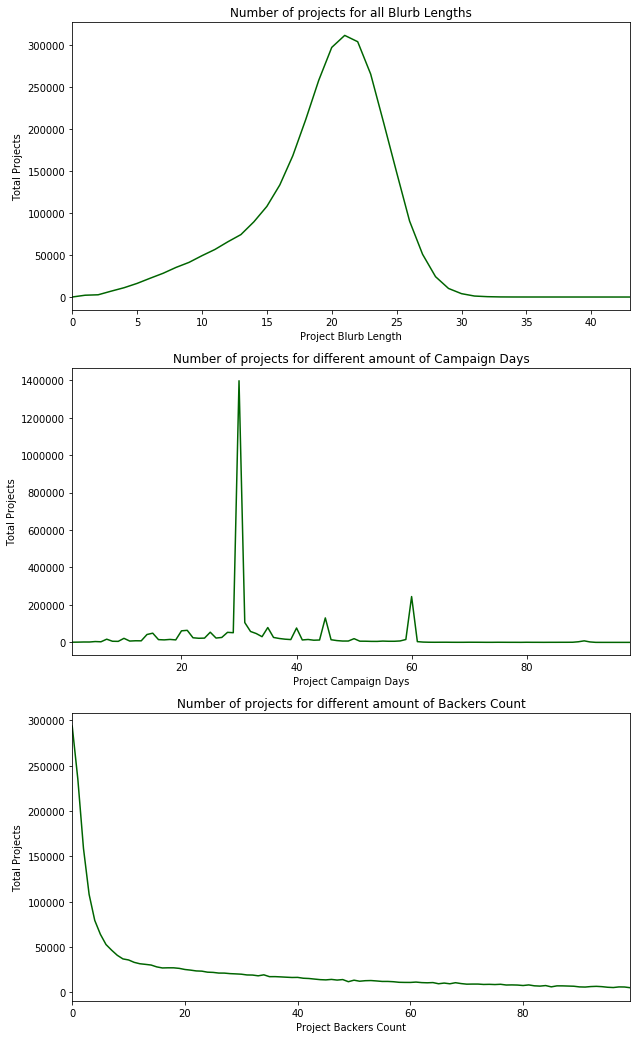

In [31]:
fig, ax = plt.subplots(3,1,figsize=(10,18))
ax[0] = data.groupby(data.blurb_length).created_at.count().plot(ax=ax[0], color=['darkgreen'])
ax[0].set_xlabel('Project Blurb Length')
ax[0].set_ylabel('Total Projects')
ax[0].set_title('Number of projects for all Blurb Lengths')

ax[1] = data.groupby(data.campaign_days).created_at.count().plot(ax=ax[1], color=['darkgreen'])
ax[1].set_xlabel('Project Campaign Days')
ax[1].set_ylabel('Total Projects')
ax[1] = ax[1].set_title('Number of projects for different amount of Campaign Days')


backers_count1 = data[data.backers_count < 100]
ax[2] = backers_count1.groupby(backers_count1.backers_count).state.count().plot(ax=ax[2], color=['darkgreen'])
ax[2].set_xlabel('Project Backers Count')
ax[2].set_ylabel('Total Projects')
ax[2] = ax[2].set_title('Number of projects for different amount of Backers Count')

fig.subplots_adjust(hspace=0.2)
plt.show()

<b> Figure A (Top) : Number of projects for all Blurb Lengths </b>

<b> Figure B (Middle) : Number of projects for different amount of Campaign Days </b>

<b> Figure C (Bottom) : Number of projects for different amount of Backers Count </b>

1. We notice that the highest total number of projects had the blurb length of approx 20
2. Its also easy to note that the number of backers for a project are very few per project. Very few projects had a high backers count.

# Step 4: Transforming the Data

### Step 4.1: Drop irrelevant columns and keep relevant ones

In [32]:
data.drop(['launched_at','created_at','deadline'],axis=1, inplace=True)

In [35]:
data['state'] = data['state'].replace({'failed': 0, 'successful': 1})

### Step 4.2: Category Encoding

In [43]:
data_transformed = pd.get_dummies(data)

#### These steps were performed to save the transformed data to a file, for future modelling of the data
```
data_transformed.to_csv('data_final_data.csv',index=False)
data_transformed = pd.read_csv('data_final_data.csv')
```

In [5]:
data_transformed = pd.read_csv('data_final_data.csv')

In [6]:
data_transformed = data_transformed.head(1000000)

In [7]:
X_train = data_transformed.drop('state', axis=1)
Y = data_transformed.state

### Step 4.3: Scaling the Dataset using StandardScaler

In [8]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))
X.head()

,backers_count,blurb_length,campaign_days,creation_to_launch_days,name_length,usd_goal,usd_pledged,launch_year,category1_art,category1_comics,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.246901,0.379805,-0.102189,-0.333265,0.839362,-0.012228,0.146493,-0.363332,-0.325492,-0.205005,...,-0.091045,-0.02939,-0.014108,-0.080673,-0.088979,-0.044968,-0.064218,-0.073869,-0.043203,-1.791418
1,0.034852,-0.021641,0.141525,0.141713,-0.990876,-0.027251,-0.020366,-1.281090,-0.325492,-0.205005,...,-0.091045,-0.02939,-0.014108,-0.080673,-0.088979,-0.044968,-0.064218,-0.073869,-0.043203,0.558217
2,0.000963,1.182696,-0.264665,-0.299338,0.473314,-0.033544,-0.068474,-1.739968,-0.325492,-0.205005,...,-0.091045,-0.02939,-0.014108,-0.080673,-0.088979,-0.044968,-0.064218,-0.073869,-0.043203,0.558217
3,0.085202,-0.222364,-1.077044,-0.239966,0.839362,-0.035986,-0.066300,-1.281090,-0.325492,-0.205005,...,-0.091045,-0.02939,-0.014108,-0.080673,-0.088979,-0.044968,-0.064218,-0.073869,-0.043203,0.558217
4,-0.110387,0.379805,-1.483234,-0.273893,-0.990876,-0.035704,-0.117428,-1.281090,-0.325492,-0.205005,...,-0.091045,-0.02939,-0.014108,-0.080673,-0.088979,-0.044968,-0.064218,-0.073869,-0.043203,0.558217


### Step 4.4: Splitting the Dataset into Train and Test Sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=123)

In [10]:
X_train.shape, y_train.shape

((750000, 45), (750000,))

In [11]:
X_test.shape, y_test.shape

((250000, 45), (250000,))

# Transformation Ends 
<b> Now we have completed our Step 4, which was transformation. Now its ready to be fed to the Machine Learning models below. </b>
<H1>----------------------------------------------------------------------------------------------------------</H1>


# Step 5 (Final): Prediction of Success of the Project using ML

<b> Now we will apply Machine Learning Classification algorithms like Logistic Regression and Random Forest to check the prediction accuracy </b>

### Step 5.1: Model 1 - Logistic Regression

Logistic regression is used as a binary classifier to predict which of two categories _*(successful or failed)*_ a data point falls in to.

#### *Fitting a logistic regression model with random_state and solver parameter*

In [12]:
clf = LogisticRegression(random_state=121,
                         solver='lbfgs')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=121, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### *Make predictions*

In [13]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [14]:
print("Logistic regression accuracy for training set:", round(clf.score(X_train, y_train),5))
print("Logistic regression accuracy for test set:", round(clf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_pred_test))


Logistic regression accuracy for training set: 0.94147
Logistic regression accuracy for test set: 0.9418

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    111440
           1       0.95      0.95      0.95    138560

    accuracy                           0.94    250000
   macro avg       0.94      0.94      0.94    250000
weighted avg       0.94      0.94      0.94    250000



In [39]:
mat = confusion_matrix(y_test,y_pred_test,labels=clf.classes_)
print('Confusion Matrix')
print('\t\t\t\tPredicted\t')
print('\t\t\t','Failed','\t','Successful')
print('-------------------------------------------------')
print('Actual\t| Failed\t|',mat[0][0],'\t',mat[0][1])
print('\t| Successful\t|',mat[1][0],'\t\t',mat[1][1])

Confusion Matrix
				Predicted	
			 Failed 	 Successful
-------------------------------------------------
Actual	| Failed	| 104142 	 7298
	| Successful	| 7251 		 131309


### Step 5.2: Model 2 - Random Forest Classification

The Random Forest algorithm is a supervised learning algorithm that can be used for classification. It works by building multiple different decision trees to predict which category a data point belongs to.

#### *Fitting a random forest classifier model with parameters such as n_estimators, max-depth, random_state, criterion*

In [41]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=121, criterion='entropy')

In [42]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=121,
                       verbose=0, warm_start=False)

#### *Make predictions*

In [43]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [46]:
print("RandomForest accuracy for training set:", round(clf.score(X_train, y_train),5))
print("RandomForest accuracy for test set:", round(clf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_pred_test))

RandomForest accuracy for training set: 0.87677
RandomForest accuracy for test set: 0.87785

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85    111440
           1       0.84      0.96      0.90    138560

    accuracy                           0.88    250000
   macro avg       0.89      0.87      0.87    250000
weighted avg       0.89      0.88      0.88    250000



In [45]:
mat = confusion_matrix(y_test,y_pred_test,labels=clf.classes_)
print('Confusion Matrix')
print('\t\t\t\tPredicted\t')
print('\t\t\t','Failed','\t','Successful')
print('-------------------------------------------------')
print('Actual\t| Failed\t|',mat[0][0],'\t',mat[0][1])
print('\t| Successful\t|',mat[1][0],'\t\t',mat[1][1])

Confusion Matrix
				Predicted	
			 Failed 	 Successful
-------------------------------------------------
Actual	| Failed	| 85898 	 25542
	| Successful	| 4996 		 133564


# Results and Discussion :

<h3> 1. Description of Methodology and Tests Performed: </h3>

<b> 
    
    
        We divided our data science problem into a series of logical steps and performed actions on each of them. The logical steps we implemented are described as below:

        1.1 We started with Data Gathering/Collection. This step allowed us to compile all the data that we need to work upon. The challenge here was to compile the relevant files to feed into our pre processing step. We Started by collecting the URL's of all the files, then unzipped them and then found out the ones which were related to the projects on Kickstarter. 
 
      1.2 Pre processing this huge dataset that we collected was a great challenge due to the size of the dataset. We performed various operations like dropping null columns, drop irrelevant columns from the dataset, getting column data into a suitable format, generated interesting features from the existing irrelevant features, generated multiple simple features from the complex column features and performed feature engineering on the short and long string types. This step was a huge step towards data cleaning. This step took a lot of time to prepare the data towards visualizing it.

      1.3 Now its time to understand the data by designing proper visualization techniques. This step is necessary to know what the data is trying to convey. Once we get the hang of the data, we can now talk to the data properly and perform transformations on it

      1.4 Now we prepare the data and transform it to make it ready to be fed to the Machine Learning models. 

      1.5 Finally we perform 2 models to check the accuracy of prediction of the success of a project, which was our initial data science problem that we trying to solve. We used Logistic Regression and Random Forest Classification to get the prediction accuracy. 
    
    Our findings are explained below:
</b>      

<h3> 2. Evaluation of Findings: </h3>

<b> After using algorithms like Logistic Regression and Random Forest, we are able to derive the following results:
    
    In the Logistic Regression :
    Logistic regression accuracy for training set: 0.94147
    Logistic regression accuracy for test set: 0.9418

    In the Random Forest:
    RandomForest accuracy for training set: 0.87677
    RandomForest accuracy for test set: 0.87785
    
   Hence we can see that after performing all the steps of Data Cleaning, Data Transformation, and Data Prediction modelling, we are able to get a 94.11% accuracy of predicting the result state of the project before its released using Logistic Regression technique. Logistic regression gave good results than random forest because, as the feature dimension goes large, the logistic regression goes on performing better than the random forest. Logistic regression optimizes the multinomial feature dimension dataset. Thus our choice of selecting Logistic Regression turns out to be a good one.
</b>

<h3> 3. Possible Next Steps : </h3>

<b> 
                        
        We hope to experiment with more ML prediction algorithms to try to test out the accuracies of every model. We can extend this model to techniques such as XGBoost classifier, Support Vector Machines Classifier to classify the new set of projects into success or failure.

</b>